In [2]:
# Import libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import datetime as dt

%matplotlib inline

plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib
#plt.rcParams['figure.figsize'] = (20, 10)

sns.set(style="whitegrid") # seteando tipo de grid en seaborn

In [48]:
# Change working directory
os.chdir('C:/Users/vfarfan/OD')
# Load the data
df = pd.read_csv('data/events.csv', dtype={'sku' : 'object'}) # sku como object para poder eliminar el .0 en los str

In [49]:
print(df.columns.values)

['timestamp' 'event' 'person' 'url' 'sku' 'model' 'condition' 'storage'
 'color' 'skus' 'search_term' 'staticpage' 'campaign_source'
 'search_engine' 'channel' 'new_vs_returning' 'city' 'region' 'country'
 'device_type' 'screen_resolution' 'operating_system_version'
 'browser_version']


# Preprocesamiento

### Procesar el campo SKU para eliminar el .0
Algunos SKUs están cargados con un .0 como si fueran decimales.  Los levantamos como string y eliminamos el .0 para normalizar el dato.

In [138]:
print(df.loc[df['sku'].isnull(),'event'].unique())
print(df.loc[df['sku'].notnull(),'event'].unique())

[ad campaign hit, visited site, generic listing, search engine hit, brand listing, searched products, staticpage, lead]
Categories (8, object): [ad campaign hit, visited site, generic listing, search engine hit, brand listing, searched products, staticpage, lead]
[viewed product, checkout, conversion]
Categories (3, object): [viewed product, checkout, conversion]


In [139]:
df.loc[df['sku'].apply(type) == str,'sku'] = df.loc[df['sku'].apply(type) == str,'sku'].str.replace('\.0', '')

### SKUs con valores undefined

In [52]:
print(df.loc[df['sku'] == 'undefined',:]['person'])
df.loc[df['person'] == '602b3649','sku'].apply(type)
df.loc[df['person'] == '655402b0',:]

368097    602b3649
387149    655402b0
Name: person, dtype: object


,timestamp,event,person,url,sku,model,condition,storage,color,skus,...,search_engine,channel,new_vs_returning,city,region,country,device_type,screen_resolution,operating_system_version,browser_version
387149,2018-05-22 13:44:53,checkout,655402b0,NaN,undefined,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
387150,2018-05-22 13:44:53,visited site,655402b0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Direct,New,Unknown,Unknown,Brazil,Computer,1366x768,Windows 7,Chrome 66.0


Existen dos eventos checkout con sku="undefined".
Nuevos usuarios, visitaron el sitio e hicieron checkout sin elegir producto.
Opciones?
- eliminar del dataset.  Eliminar también otros registros de las mismas personas?
- se puede rellenar de algún modo?  Con nan?

In [53]:
# Elimino SKUs "undefined"
#df = df.loc[df['sku'] != 'undefined',:]

In [54]:
# Paso undefined a nan
#df.loc[df['sku'] == 'undefined','sku'] = np.nan

### Convertir datos categóricos

In [66]:
# Convert data types
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['event'] = pd.Categorical(df['event'])
#df['person']
df['url'] = pd.Categorical(df['url'])
df['sku'] = pd.Categorical(df['sku'])
df['model'] = pd.Categorical(df['model'])
df['condition'] = pd.Categorical(df['condition'])
df['storage'] = pd.Categorical(df['storage'])
df['color'] = pd.Categorical(df['color'])
#df['skus'] = pd.Categorical(df['skus'])
#df['search_term']
df['staticpage'] = pd.Categorical(df['staticpage'])
df['campaign_source'] = pd.Categorical(df['campaign_source'])
df['search_engine'] = pd.Categorical(df['search_engine'])
df['channel'] = pd.Categorical(df['channel'])
df['new_vs_returning'] = pd.Categorical(df['new_vs_returning'])
df['city'] = pd.Categorical(df['city'])
df['region'] = pd.Categorical(df['region'])
df['country'] = pd.Categorical(df['country'])
df['device_type'] = pd.Categorical(df['device_type'])
df['screen_resolution'] = pd.Categorical(df['screen_resolution'])
df['operating_system_version'] = pd.Categorical(df['operating_system_version'])
df['browser_version'] = pd.Categorical(df['browser_version'])


### Agregar día y mes

In [57]:
df['day'] = df['timestamp'].dt.to_period('D').dt.to_timestamp()
df['month'] = df['timestamp'].dt.to_period('M').dt.to_timestamp()

### Extraer marca del campo model
La primer palabra en este campo corresponde a la marca del producto.

In [64]:
df['brand'] = pd.Categorical(df['model'].str.split(' ').str.get(0))

In [140]:
df.describe()

,timestamp,event,person,url,sku,model,condition,storage,color,skus,...,city,region,country,device_type,screen_resolution,operating_system_version,browser_version,day,month,brand
count,1011288,1011288,1011288,82756,563838,564284,563836,563836,563836,221699,...,87378,87378,87378,87378,87378,87378,87378,1011288,1011288,564284
unique,793805,11,27624,227,2206,202,5,8,63,35310,...,1939,93,46,4,282,121,343,166,6,10
top,2018-05-15 15:56:06,viewed product,71492f2b,/,2830,iPhone 6,Bom,16GB,Preto,"2820,6706,6720,2750,6649,7251,6663,12604,7224,...",...,Unknown,Sao Paulo,Brazil,Smartphone,360x640,Windows 7,Chrome 66.0,2018-05-15 00:00:00,2018-05-01 00:00:00,iPhone
freq,11,528931,2771,28323,4452,50916,243014,190833,132960,594,...,15819,24996,84308,44239,30009,19675,22611,25797,474949,256585
first,2018-01-01 07:32:26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-01 00:00:00,2018-01-01 00:00:00,NaN
last,2018-06-15 23:59:31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-06-15 00:00:00,2018-06-01 00:00:00,NaN


# Análisis

In [136]:
print(min(df['timestamp']))
print(max(df['timestamp']))

2018-01-01 07:32:26
2018-06-15 23:59:31


## Clientes

In [133]:
print("Clientes")
print(df['person'].nunique())

Clientes
27624


### Nuevos clientes
Los nuevos clientes entran con un visited site. Usan en su mayoría smartphone o computadora, con Chrome, y llegan por el canal Paid.

In [134]:
df['new_vs_returning'].unique()
dfnew = df.loc[df['new_vs_returning'] == 'New',] # 26898
print("\nEvento por el cual llegan nuevos clientes")
print(dfnew['event'].value_counts().head(2))
print("\nDispositivo más usado por nuevos clientes")
print(dfnew['device_type'].value_counts())
#dfnew['operating_system'].value_counts()
print('\nBrowser más usados por nuevos clientes')
print(dfnew['browser_version'].value_counts().head(10))
print("\nNuevos clientes llegan por el canal Paid")
print(dfnew['channel'].value_counts())
print('\nCampañas por nuevos clientes')
print(dfnew['campaign_source'].value_counts().head(10))


Evento por el cual llegan nuevos clientes
visited site      26898
viewed product        0
Name: event, dtype: int64

Dispositivo más usado por nuevos clientes
Smartphone    14305
Computer      12073
Tablet          478
Unknown          42
Name: device_type, dtype: int64

Browser más usados por nuevos clientes
Chrome 66.0           7292
Chrome Mobile 66.0    5290
Chrome Mobile 39      1617
Chrome 67.0           1364
Chrome Mobile 67.0    1173
Chrome Mobile 65.0    1061
Chrome 65.0            964
Mobile Safari 11       726
Chrome Mobile 64.0     585
Chrome 64.0            427
Name: browser_version, dtype: int64

Nuevos clientes llegan por el canal Paid
Paid        17809
Organic      5709
Direct       2207
Referral      684
Social        478
Email          10
Unknown         1
Name: channel, dtype: int64

Campañas por nuevos clientes
zanox               0
yotpo               0
FacebookAds         0
FacebookSocial      0
Google Social       0
MARKETING SOCIAL    0
afiliado            0
af

Hay un pico de nuevos clientes a mediados de mayo.  A qué se debe?

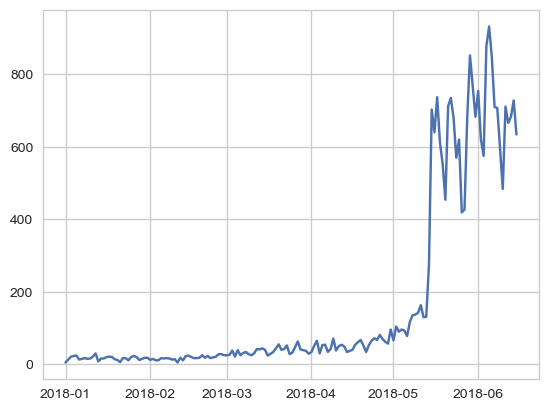

In [141]:
dfnew = df.loc[df['new_vs_returning'] == 'New',('day', 'new_vs_returning')].groupby('day').count()
dfnew
plt.plot(dfnew)
plt.show()

## Tipos de eventos
Hay un pico de transacciones a mediados de mayo.  ¿A qué se debe?
- una nueva campaña?
- un evento externo?

In [87]:
df2 = df.loc[:,('day', 'event', 'timestamp')].groupby(['day', 'event']).count().fillna(0)
df2 = df2.unstack()
# elimino el nivel de índice timestamp
df2.columns = df2.columns.droplevel()


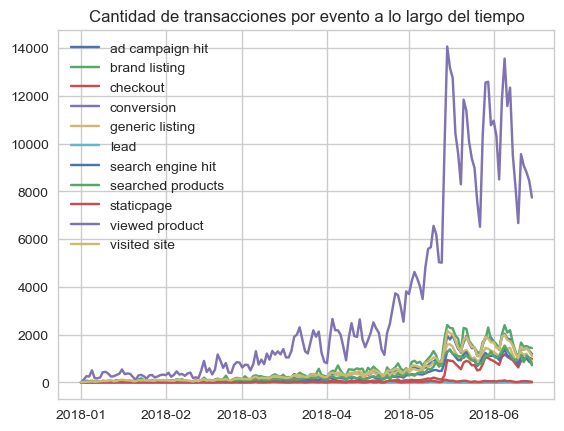

In [88]:

plt.plot(df2)
plt.legend(df2.columns.values)
plt.title('Cantidad de transacciones por evento a lo largo del tiempo')
plt.show()

viewed product tiene el mayor pico

### Por marca

In [89]:
df['brand'].value_counts()

iPhone        256585
Samsung       218127
Motorola       63518
LG              9724
Sony            7025
Lenovo          4779
Asus            2091
iPad            1914
Quantum          520
Blackberry         1
Name: brand, dtype: int64

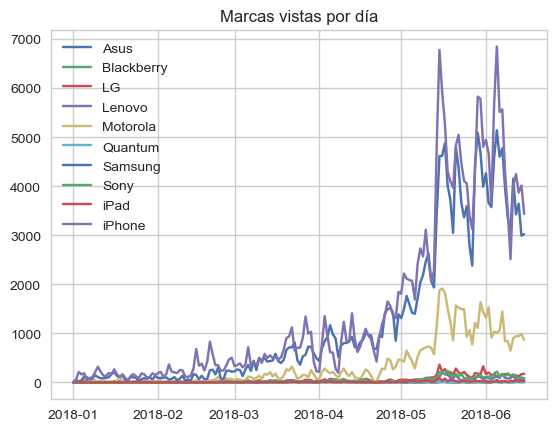

In [131]:
df2 = df.loc[df['event'] == 'viewed product',('day','brand','timestamp')].groupby(['day','brand']).count().fillna(0)
df2 = df2.unstack()
#elimino el nivel de índice timestamp
df2.columns = df2.columns.droplevel()
plt.plot(df2)
plt.legend(df2.columns.values)
plt.title("Marcas vistas por día")
plt.show()

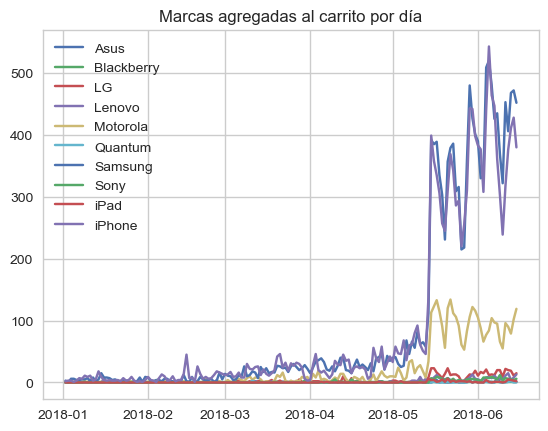

In [132]:
df2 = df.loc[df['event'] == 'checkout',('day','brand','timestamp')].groupby(['day','brand']).count().fillna(0)
df2 = df2.unstack()
#elimino el nivel de índice timestamp
df2.columns = df2.columns.droplevel()
plt.plot(df2)
plt.legend(df2.columns.values)
plt.title("Marcas agregadas al carrito por día")
plt.show()

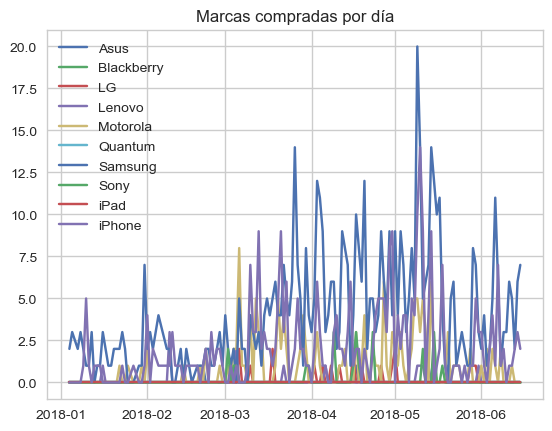

In [92]:
df2 = df.loc[df['event'] == 'conversion',('day','brand','timestamp')].groupby(['day','brand']).count().fillna(0)
df2 = df2.unstack()
#elimino el nivel de índice timestamp
df2.columns = df2.columns.droplevel()
plt.plot(df2)
plt.legend(df2.columns.values)
plt.title("Marcas compradas por día")
plt.show()

En los productos vistos y agregados al carrito se presenta el pico en mayo.  Sin embargo en los productos comprados no es tan marcado.
Si este pico se debe a una campaña, ésta logró atraer nuevos clientes, aumentaron las visualizaciones y el checkout de productos, sin embargo el aumento en las compras fue momentáneo.

## Viewed product / checkout / conversion

In [142]:
# filtro los eventos de tipo "viewed product"
viewed = df.loc[df['event'] == 'viewed product',('person','timestamp','sku')].sort_values(by=['person','timestamp','sku'])
viewed = viewed.rename(columns = {'timestamp':'timestamp_viewed'})
print('Total eventos de tipo viewed product:', viewed.count()[1])

Total eventos de tipo viewed product: 528931


In [126]:
# filtro los eventos de tipo "checkout"
co = df.loc[df['event'] == 'checkout',('timestamp','event','person','sku')]
co = co.rename(columns = {'timestamp':'timestamp_checkout'})
co.set_index(['person','timestamp_checkout','sku'])
#co = co.drop('event', axis=1)
print('Total eventos de tipo checkout:', co.count()[1])

Total eventos de tipo checkout: 33735


In [127]:
# con un join obtengo las personas que tuvieron un evento de tipo "viewed product" 
# y un evento de tipo "checkout" para el mismo SKU

#viewjoin = viewed.join(co.set_index(['person','day','sku']), on=['person','day','sku'])
viewjoin = viewed.merge(co, how='inner')
# me quedo sólo con los que tuvieron el evento checkout después del evento viewed product
viewjoin = viewjoin.loc[viewjoin['timestamp_viewed'] < viewjoin['timestamp_checkout'],:]

# calculo el porcentaje
converted = viewjoin.count()[1]/viewed.count()[1]
print('Porcentaje de productos vistos que pasaron al carrito:', round(converted * 100),'%')

Porcentaje de productos vistos que pasaron al carrito: 14.0 %


In [128]:
# filtro los eventos de tipo "conversion"
conv = df.loc[df['event'] == 'conversion',('timestamp','event','person','sku')]
conv.set_index(['person','sku'])
#co = co.drop('event', axis=1)
print('Total eventos de tipo conversion:', conv.count()[1])

Total eventos de tipo conversion: 1172


In [129]:
# con un join obtengo las personas que tuvieron un evento de tipo "viewed product", un evento de tipo "checkout" 
# y un evento "conversion" para el mismo SKU

#viewjoin = viewed.join(co.set_index(['person','day','sku']), on=['person','day','sku'])
convjoin = viewjoin.loc[:,('person','timestamp_checkout','sku')].merge(conv, how='inner')
# me quedo sólo con los que tuvieron el evento conversion después del evento checkout
convjoin = convjoin.loc[convjoin['timestamp_checkout'] < convjoin['timestamp'],:]

# calculo el porcentaje
converted = convjoin.count()[1]/viewed.count()[1]
print('Porcentaje de productos vistos que fueron comprados:', round(converted * 100),'%')

converted = convjoin.count()[1]/viewjoin.count()[1]
print('Porcentaje de productos en el carrito que fueron comprados:', round(converted * 100),'%')


Porcentaje de productos vistos que fueron comprados: 1.0 %
Porcentaje de productos en el carrito que fueron comprados: 8.0 %
